<a href="https://colab.research.google.com/github/bogard75/bogard75.github.io/blob/master/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EA%B5%90%EA%B3%BC%EC%84%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[머신러닝 교과서] Chapter2


In [0]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)

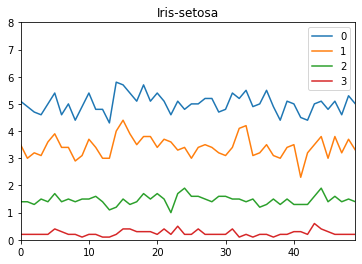

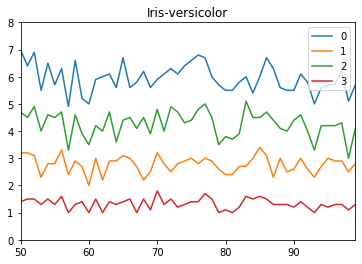

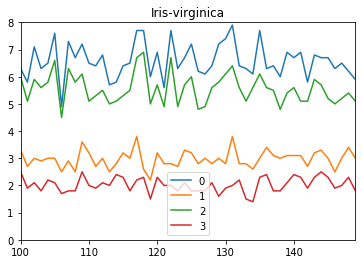

In [34]:
#df[df[4]=='Iris-setosa'].plot()
#df.plot()
for i, _df in df.groupby(df[4]):
    fig = _df.plot(ylim=(0,8))
    fig.set_title(i)

In [0]:
import numpy as np

class Perceptron(object):
    """

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen  = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0 
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X)>=0.0, 1, -1)


In [0]:
y = df.loc[0:100, 4].values
y = np.where(y=='Iris-setosa', -1, 1)

In [0]:
X = df.iloc[0:100, [0, 2]].values

In [59]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

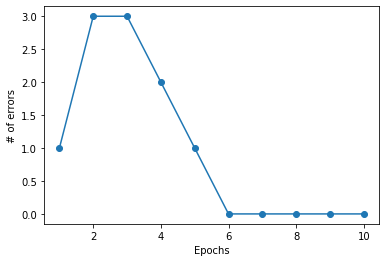

In [64]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('# of errors')
plt.show()